In [1]:
# This takes host-star-subtracted frames and finds residuals, with a view to actually using
# this code in the pipeline

# created from parent 2020 May 16 by E.S.

In [6]:
import urllib
import numpy as np
import glob
import os
from scipy import ndimage, misc, stats
from astropy.io import fits
import matplotlib.pyplot as plt

% matplotlib inline
#% matplotlib qt

In [7]:
stem = "/Users/nyumbani/Downloads/"

In [8]:
def shave_and_rotate(img, angle):
    '''
    Shave off edges of frames (to get rid of the NaNs) and rotate
    '''
    
    edge_size_shave = 150 # shave off the edges
    
    # shave off edges symmetrically
    img_shaved = img[edge_size_shave:int(np.shape(img)[0]-edge_size_shave),
                     edge_size_shave:int(np.shape(img)[1]-edge_size_shave)]
    
    img_shaved_rotated = ndimage.rotate(img_shaved, angle, reshape=False)

    return img_shaved_rotated

In [9]:
# read in frames of strips along which fake planets were injected
file_name_array_planet_centered = list(glob.glob(stem+"job_3203135/adi_frame_129.68_0.01040896_0.1_0.1.fits"))

# ... and read in the other strips which did not have fake planets directly injected in the center of the stripe,
# but which may have some residuals from planets injected along a different angle
file_name_array_planet_not_centered = list(glob.glob(stem+"no_planet_examples/*.fits"))

In [10]:
# read in frames of the other strips (but with no planet)

strip_0_of_4_no_centered_planet, header = fits.getdata(stem+"job_3204745/adi_frame_129.68_0.01040896_0.0_0.0.fits",0,header=True)
strip_1_of_4_no_centered_planet, header = fits.getdata(stem+"job_3204751/adi_frame_129.68_0.01040896_0.0_0.0.fits",0,header=True)
strip_2_of_4_no_centered_planet, header = fits.getdata(stem+"job_3204753/adi_frame_129.68_0.01040896_0.0_0.0.fits",0,header=True)
strip_3_of_4_no_centered_planet, header = fits.getdata(stem+"job_3204756/adi_frame_129.68_0.01040896_0.0_0.0.fits",0,header=True)
strip_4_of_4_no_centered_planet, header = fits.getdata(stem+"job_3204759/adi_frame_129.68_0.01040896_0.0_0.0.fits",0,header=True)

In [11]:
# do simple processing of the strips

rotated_strip_1 = shave_and_rotate(strip_1_of_4_no_centered_planet,angle=19.218)
rotated_strip_2 = shave_and_rotate(strip_2_of_4_no_centered_planet,angle=13.43)
rotated_strip_3 = shave_and_rotate(strip_3_of_4_no_centered_planet,angle=6.63)
rotated_strip_4 = shave_and_rotate(strip_4_of_4_no_centered_planet,angle=-0.04)

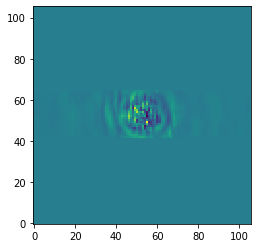

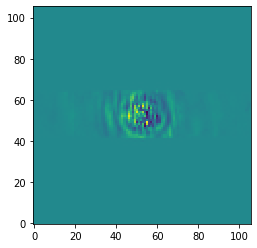

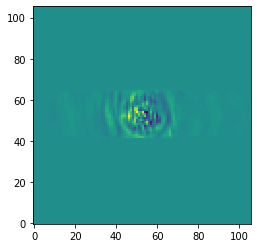

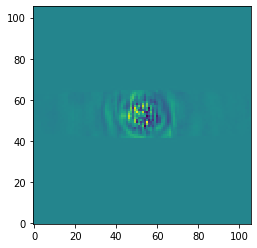

In [12]:
# show the stips without planets

'''
plt.clf()
plt.imshow(rotated_strip_0, origin="lower")
plt.colorbar()
plt.show()
'''

plt.clf()
plt.imshow(rotated_strip_1, origin="lower")
plt.show()

plt.clf()
plt.imshow(rotated_strip_2, origin="lower")
plt.show()

plt.clf()
plt.imshow(rotated_strip_3, origin="lower")
plt.show()

plt.clf()
plt.imshow(rotated_strip_4, origin="lower")
plt.show()

In [13]:
# make dictionaries of marginalizations and cross-sections of strips without any planets

'''
marginalization_dict = {}
marginalization_dict["strip_0"] = np.sum(rotated_strip_0,axis=0)
marginalization_dict["strip_1"] = np.sum(rotated_strip_1,axis=0)
marginalization_dict["strip_2"] = np.sum(rotated_strip_2,axis=0)
marginalization_dict["strip_3"] = np.sum(rotated_strip_3,axis=0)
marginalization_dict["strip_4"] = np.sum(rotated_strip_4,axis=0)
'''

cross_sec_dict = {}
cross_sec_dict["strip_1"] = rotated_strip_1[int(0.5*np.shape(rotated_strip_1)[0]),:]
cross_sec_dict["strip_2"] = rotated_strip_2[int(0.5*np.shape(rotated_strip_2)[0]),:]
cross_sec_dict["strip_3"] = rotated_strip_3[int(0.5*np.shape(rotated_strip_3)[0]),:]
cross_sec_dict["strip_4"] = rotated_strip_4[int(0.5*np.shape(rotated_strip_4)[0]),:]

Saved experiment_adi_frame_129.68_0.01040896_0.1_0.1.fits.png
------------------
0.06603773584905659
106
7.280109889280518


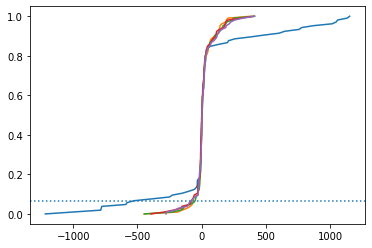

In [20]:
# make plots

file_name_array_choice = file_name_array_planet_centered
plot_file_name_prefix = "experiment_"

for file_num in range(0,len(file_name_array_choice)):
    
    # find planet location in asec
    planet_loc_asec = float(file_name_array_choice[file_num].split("_")[-3])
    # convert to pixels (as measured from center)
    planet_loc_pix = np.divide(planet_loc_asec,0.0107)

    img, header = fits.getdata(file_name_array_choice[file_num],0,header=True)
    img_rotated = shave_and_rotate(img,angle=39.68)

    f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 8))
    #fig = plt.figure(figsize=(8, 6))
    
    # 2D color plot
    subplot1 = ax1.imshow(img_rotated, origin="lower", aspect="auto", vmin=-5000, vmax=5000)
    ax1.axvline(x=0.5*np.shape(img_rotated)[0]-planet_loc_pix, linestyle=":", color="k", linewidth=4, alpha=0.4)
    #plt.colorbar(subplot1)
    
    # cross-section along x
    cross_sec_this_one = img_rotated[int(0.5*np.shape(img_rotated)[0]),:]
    ax2.plot(cross_sec_dict["strip_1"], linestyle=":", color="k", alpha=0.2, label="cross-sec of planetless strips")
    ax2.plot(cross_sec_dict["strip_2"], linestyle=":", color="k", alpha=0.2)
    ax2.plot(cross_sec_dict["strip_3"], linestyle=":", color="k", alpha=0.2)
    ax2.plot(cross_sec_dict["strip_4"], linestyle=":", color="k", alpha=0.2)
    ax2.plot(cross_sec_this_one, label="cross-sec of strip with planet")
    ax2.axvline(x=0.5*np.shape(img_rotated)[0]-planet_loc_pix, linestyle=":", color="k", linewidth=4, alpha=0.4)
    ax2.legend()
    ax2.set_title('cross-sec')
    ax2.set_ylim([-3000,6000])
    
    # plot difference in cross-sections between different strips
    ax3.plot(np.subtract(cross_sec_this_one,cross_sec_dict["strip_1"]), label="diff with strip 1")
    ax3.plot(np.subtract(cross_sec_this_one,cross_sec_dict["strip_2"]), label="diff with strip 2")
    ax3.plot(np.subtract(cross_sec_this_one,cross_sec_dict["strip_3"]), label="diff with strip 3")
    ax3.plot(np.subtract(cross_sec_this_one,cross_sec_dict["strip_4"]), label="diff with strip 4")
    ax3.legend()
    #ax6.set_ylim([-400,700]) # for 0.01 companions
    ax3.set_ylim([-3000,6000]) # for 0.1 companions
    ax3.set_title("diff in cross secs")
    
    new_filename = plot_file_name_prefix + os.path.basename(file_name_array_choice[file_num])+".png"
    f.suptitle(plot_file_name_prefix + os.path.basename(file_name_array_choice[file_num]))
    #plt.tight_layout()
    plt.savefig(new_filename, dpi=150)
    plt.close()
    #plt.show()
    
    print("Saved " + new_filename)
    
    #######################
    # 2-sample KS test
    print("------------------")
    n0 = len(cross_sec_this_one)
    n1 = len(cross_sec_dict["strip_1"])
    n2 = len(cross_sec_dict["strip_2"])
    n3 = len(cross_sec_dict["strip_3"])
    n4 = len(cross_sec_dict["strip_4"])
    rvs0 = cross_sec_this_one
    rvs1 = cross_sec_dict["strip_1"]
    rvs2 = cross_sec_dict["strip_2"]
    rvs3 = cross_sec_dict["strip_3"]
    rvs4 = cross_sec_dict["strip_4"]
    
    # The python function returns D, the max|distrib_1 - distrib_2|, so this needs to 
    # be multiplied by 
    # scale_fac = (mn/(m+n))^(1/2)
    
    D, p_val = stats.ks_2samp(rvs1, rvs2)
    scale_fac = np.sqrt(np.divide(n0*n1,n0+n1))
    
    print(D)
    print(len(rvs1))
    print(scale_fac)
    
    # set significance level
    alpha = 0.05
    
    # plot CDFs
    data_sorted_0 = np.sort(cross_sec_this_one) # sort the data
    data_sorted_1 = np.sort(cross_sec_dict["strip_1"])
    data_sorted_2 = np.sort(cross_sec_dict["strip_2"])
    data_sorted_3 = np.sort(cross_sec_dict["strip_3"])
    data_sorted_4 = np.sort(cross_sec_dict["strip_4"])
    # calculate the proportional values of samples
    p_0 = 1. * np.arange(len(data_sorted_0)) / (len(data_sorted_0) - 1)
    p_1 = 1. * np.arange(len(data_sorted_1)) / (len(data_sorted_1) - 1)
    p_2 = 1. * np.arange(len(data_sorted_2)) / (len(data_sorted_2) - 1)
    p_3 = 1. * np.arange(len(data_sorted_3)) / (len(data_sorted_3) - 1)
    p_4 = 1. * np.arange(len(data_sorted_4)) / (len(data_sorted_4) - 1)
    
    plt.clf()
    plt.plot(data_sorted_0, p_0)
    plt.plot(data_sorted_1, p_1)
    plt.plot(data_sorted_2, p_2)
    plt.plot(data_sorted_3, p_3)
    plt.plot(data_sorted_4, p_4)
    plt.axhline(D, linestyle=":")
    plt.show()